# Importing Libraries:


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import skew, kurtosis

In [12]:
# Loading the Dataset:
def load_and_prepare_data(data):
    """
    Load and prepare the dataset for analysis.
    
    Parameters:
    data (pd.DataFrame): The dataset.
    
    Returns:
    pd.DataFrame: Cleaned and prepared dataset.
    """
    return data

In [13]:
# Create the dataframe
data = pd.read_csv("euro2024_players.csv")

# Load and prepare data
data = load_and_prepare_data(data)

# EDA:

In [15]:
def statistical_analysis(data):
    """
    Perform statistical analysis on the dataset.
    
    Parameters:
    data (pd.DataFrame): The dataset to analyze.
    
    Returns:
    pd.DataFrame: Summary of descriptive statistics including mean, median, standard deviation, skewness, and kurtosis.
    """
    # Calculate required statistics
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    skewness = data.skew()
    kurtosis = data.kurtosis()
    
    # Combine into a single DataFrame
    summary = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })
    
    return summary

In [16]:
# Statistical Analysis
summary_statistics = statistical_analysis(data)
summary_statistics

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_6388\3294244822.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_6388\3294244822.py:13: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = data.median()
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_6388\3294244822.py:14: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Sel

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Age,2.704013e+01,27.0,4.124275e+00,0.322781,-0.147908
Height,1.841814e+02,185.0,6.569258e+00,-0.174848,-0.497348
Caps,3.033868e+01,21.0,3.098790e+01,1.760753,3.794093
Goals,4.152488e+00,1.0,1.008680e+01,6.206936,53.367103
MarketValue,1.840903e+07,9000000.0,2.426195e+07,2.678094,10.202898


<p>The table summarizes the statistical analysis for various attributes, including Age, Height, Caps, Goals, and Market Value. "Age" has a mean of approximately 27.04 years with low skewness and kurtosis, indicating a near-normal distribution. "Height" has a mean of about 184.18 cm and a median of 185 cm, also showing a near-normal distribution with slight negative skewness and kurtosis. "Caps" (appearances) show a mean of around 30.34 and exhibit positive skewness (1.76) and moderate kurtosis (3.79), suggesting occasional high values. "Goals" display a mean of about 4.15, but with high skewness (6.21) and very high kurtosis (53.37), indicating a distribution with many low values and few high values. "Market Value" has a mean of approximately 18.41 million with significant positive skewness (2.68) and high kurtosis (10.20), reflecting a distribution with many low values and some extremely high values. These statistics reveal the variability and distribution characteristics across these attributes.</p>

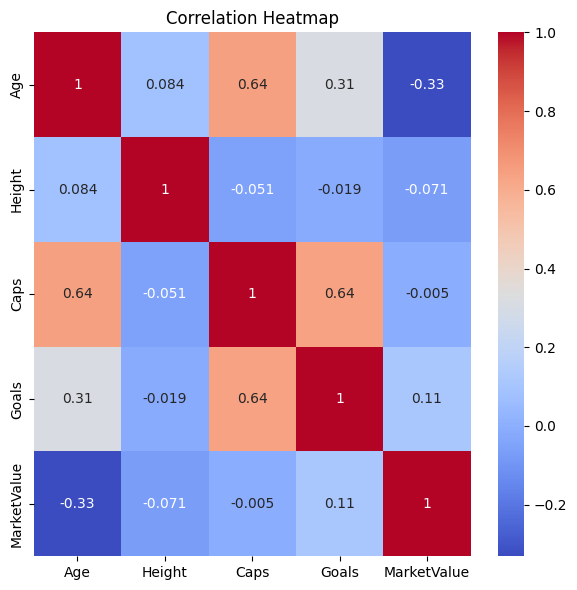

In [20]:
def plot_heatmap(data):
    """
    Plot a heatmap of the correlation matrix.
    
    Parameters:
    data (pd.DataFrame): The dataset to compute the correlation matrix.
    """
    correlation_matrix = data.corr(numeric_only=True)
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# Plot heatmap
plot_heatmap(data)

<p>The correlation heatmap visualizes the relationships between Age, Height, Caps, Goals, and Market Value. Each cell shows the Pearson correlation coefficient between the pairs of variables, with values ranging from -1 to 1. Positive correlations are indicated by red shades, while negative correlations are shown in blue. The strongest positive correlations are observed between Age and Caps (0.64), Caps and Goals (0.64), and Age and Goals (0.31), suggesting that as players get older, they tend to have more appearances and score more goals. Market Value shows a moderate negative correlation with Age (-0.33), indicating that younger players tend to have higher market values. Height has weak correlations with all other variables, suggesting that it does not significantly influence other factors in this dataset. The heatmap effectively highlights these relationships, providing insights into the dynamics between the analyzed variables.</p>

In [30]:
def plot_multiple_categorical_distribution(data):
    """
    Plot the distribution of multiple categorical variables.
    
    Parameters:
    data (pd.DataFrame): The dataset containing categorical variables.
    """
    plt.figure(figsize=(14, 14))
    
    # Distribution of Countries
    plt.subplot(2, 2, 1)
    sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index, palette='viridis')
    plt.title('Distribution of Countries')
    plt.xlabel('Count')
    plt.ylabel('Country')
    

    # Distribution of Preferred Foot
    plt.subplot(2, 2, 2)
    sns.countplot(data=data, x='Foot', palette='coolwarm')
    plt.title('Distribution of Preferred Foot')
    plt.xlabel('Preferred Foot')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_6388\1852037976.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index, palette='viridis')
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_6388\1852037976.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Foot', palette='coolwarm')


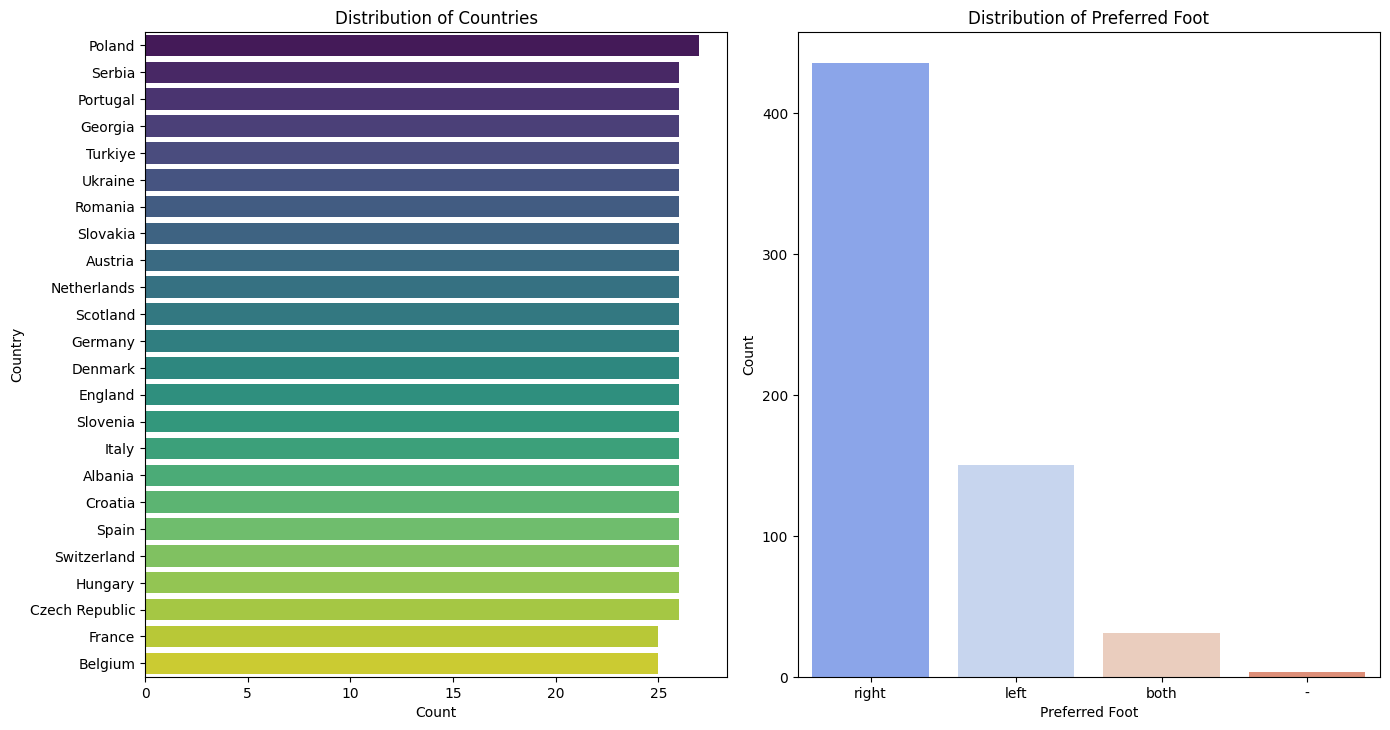

In [31]:
# Plot multiple categorical distributions
plot_multiple_categorical_distribution(data)

 <p>The two plots provide insights into the distribution of countries and preferred foot in the dataset. The first plot on the left shows the distribution of players across different countries. The bars are color-coded with a gradient palette, highlighting that Poland has the highest count, followed by Serbia, Portugal, and other countries with similar frequencies. This horizontal bar plot effectively displays the relative representation of each country in the dataset, with clear labels and a neat layout.</p>

<p>The second plot on the right illustrates the distribution of preferred foot among players. The majority of players prefer using their right foot, as indicated by the tallest bar. A significant number also prefer the left foot, while a smaller proportion are proficient with both feet. The color palette used in this bar plot enhances the visual appeal, making the differences between categories easily distinguishable. Together, these plots provide a comprehensive overview of the categorical distributions, helping to understand the diversity and preferences within the dataset.</p>


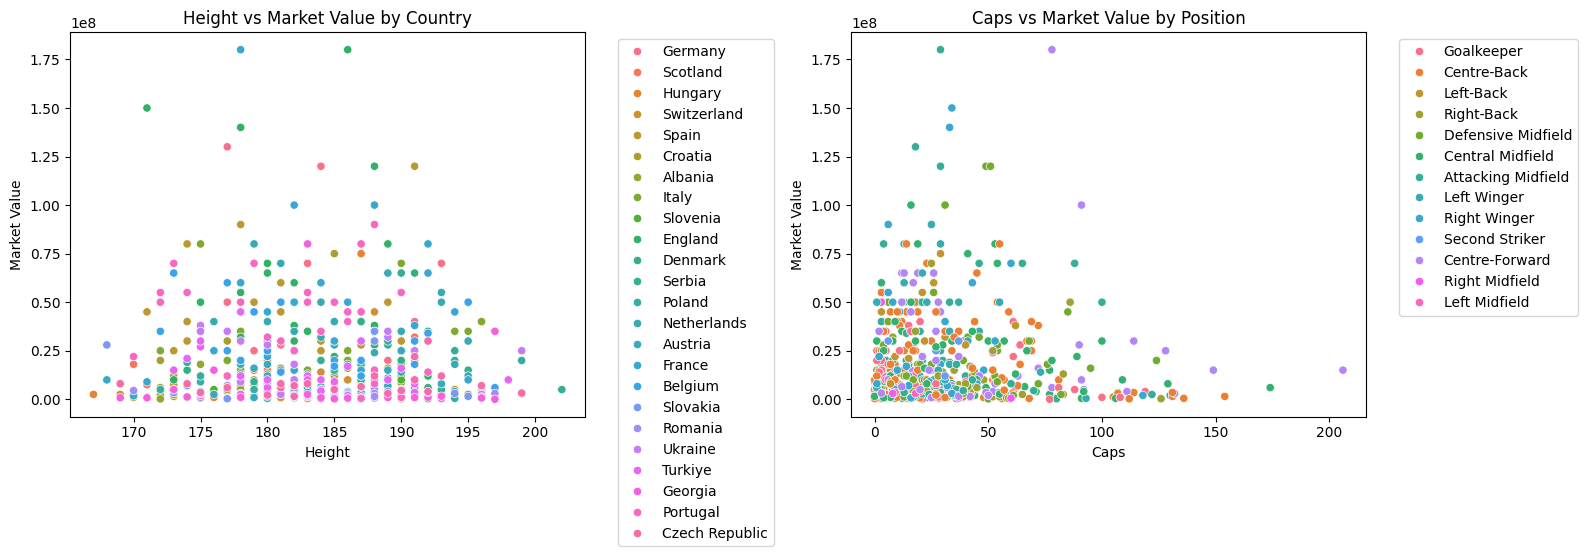

In [36]:
def plot_multiple_scatter(data):
    """
    Plot scatter plots for multiple categories.
    
    Parameters:
    data (pd.DataFrame): The dataset containing numerical and categorical variables.
    """
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Height', y='MarketValue', hue='Country', data=data)
    plt.title('Height vs Market Value by Country')
    plt.xlabel('Height')
    plt.ylabel('Market Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Caps', y='MarketValue', hue='Position', data=data)
    plt.title('Caps vs Market Value by Position')
    plt.xlabel('Caps')
    plt.ylabel('Market Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot multiple scatter plots
plot_multiple_scatter(data)


<p>The two scatter plots provide a detailed analysis of the relationships between Height, Caps, and Market Value, categorized by Country and Position. The first plot on the left, titled "Height vs Market Value by Country," shows that there is no clear linear relationship between a player's height and their market value. Players from various countries are color-coded, and the plot reveals a wide dispersion of market values across different heights, indicating that height is not a significant factor in determining market value.</p>

<p>The second plot on the right, titled "Caps vs Market Value by Position," illustrates the relationship between the number of caps (appearances) and market value. The data points are color-coded by player positions. The plot shows a cluster of players with fewer caps and lower market values, while some players with a high number of caps have varying market values. This suggests that while experience (measured by caps) can influence market value, it is not the sole determinant. Different positions also show varied market value distributions, indicating the influence of playing position on a player's market value.</p>

<p>Overall, these scatter plots provide valuable insights into the factors affecting players' market values, highlighting the diversity and complexity of these relationships across different countries and positions.</p>
</body>

# K-Means Clustering:

In [37]:
def train_kmeans(data, n_clusters):
    """
    Train a K-Means clustering model.
    
    Parameters:
    data (pd.DataFrame): The dataset containing features for clustering.
    n_clusters (int): The number of clusters for K-Means.
    
    Returns:
    KMeans: Trained K-Means model.
    pd.DataFrame: Data with cluster labels.
    """
    features = data[['Age', 'MarketValue']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data['Cluster'] = kmeans.fit_predict(scaled_features)
    
    return kmeans, data


In [38]:
def evaluate_kmeans(data, max_clusters=10):
    """
    Evaluate K-Means clustering using Elbow method and Silhouette score.
    
    Parameters:
    data (pd.DataFrame): The dataset containing features for clustering.
    max_clusters (int): Maximum number of clusters to evaluate.
    """
    features = data[['Age', 'MarketValue']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Elbow method
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.tight_layout()
    plt.show()
    
    # Silhouette score
    silhouette_avg = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(scaled_features)
        silhouette_avg.append(silhouette_score(scaled_features, kmeans.labels_))
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_avg, marker='o')
    plt.title('Silhouette Score for Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()


In [39]:
def plot_clusters(data):
    """
    Plot the results of K-Means clustering.
    
    Parameters:
    data (pd.DataFrame): The dataset containing cluster labels.
    """
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Age', y='MarketValue', hue='Cluster', data=data, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel('Age')
    plt.ylabel('Market Value')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

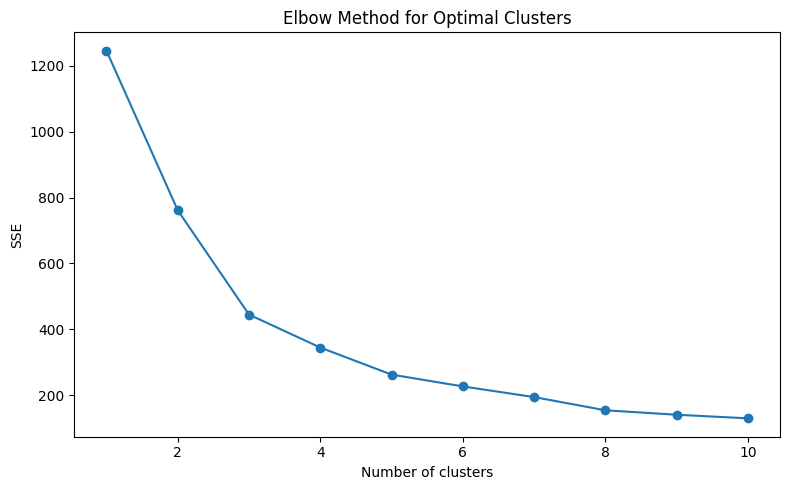

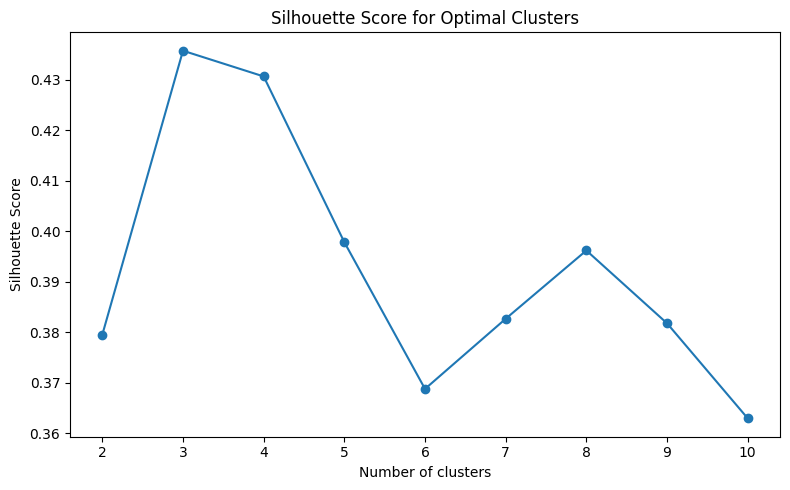

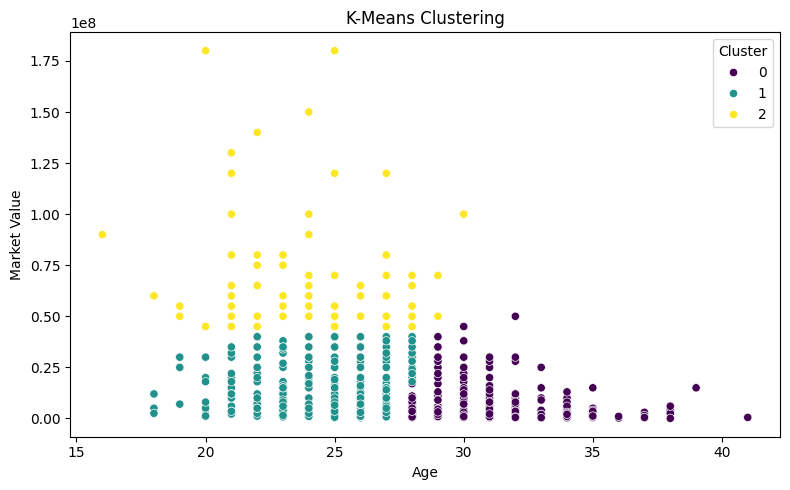

In [40]:
# K-Means Clustering
evaluate_kmeans(data, max_clusters=10)
kmeans_model, clustered_data = train_kmeans(data, n_clusters=3)
plot_clusters(clustered_data)

<p>The first plot depicts the Elbow Method used to determine the optimal number of clusters for a dataset. The x-axis represents the number of clusters, while the y-axis shows the Sum of Squared Errors (SSE). As the number of clusters increases, the SSE decreases, indicating better compactness within clusters. However, the rate of decrease in SSE slows down after a certain point, forming an "elbow" shape. In this plot, the elbow appears around 3 to 4 clusters, suggesting that this range could be the optimal number of clusters for the dataset. Beyond this point, adding more clusters provides diminishing returns in reducing SSE, implying that 3 or 4 clusters balance compactness and simplicity.</p>

<p>The second plot, "Silhouette Score for Optimal Clusters," evaluates the optimal number of clusters for K-Means clustering by using the silhouette score. The x-axis represents the number of clusters, while the y-axis shows the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. The highest silhouette score is observed for 3 clusters, indicating that this is the optimal number for the dataset, as it maximizes cluster cohesion and separation.</p>

<p>The third plot, "K-Means Clustering," visualizes the results of the K-Means clustering algorithm on the dataset, using Age and Market Value as features. The data points are colored based on the cluster they belong to, with three distinct clusters identified. Cluster 0 (purple) contains older players with generally lower market values, Cluster 1 (teal) consists of younger players with varied market values, and Cluster 2 (yellow) includes players with high market values, typically younger. This plot highlights the grouping of players based on their age and market value, demonstrating the effectiveness of the clustering algorithm in identifying distinct segments within the data.</p>

# Linear Regression:


In [41]:
def train_regression(data):
    """
    Train a linear regression model.
    
    Parameters:
    data (pd.DataFrame): The dataset containing features and target for regression.
    
    Returns:
    LinearRegression: Trained linear regression model.
    np.ndarray: Predicted values.
    """
    X = data[['Age']].values
    y = data['MarketValue'].values
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)
    return reg, y_pred


In [52]:
def plot_regression(data, y_pred):
    """
    Plot the results of linear regression.
    
    Parameters:
    data (pd.DataFrame): The dataset containing features and target for regression.
    y_pred (np.ndarray): Predicted values from the regression model.
    """
    X = data[['Age']].values
    y = data['MarketValue'].values
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
    plt.errorbar(X.flatten(), y, yerr=np.abs(y - y_pred), fmt='o', ecolor='lightgray', alpha=0.5)
    plt.title('Linear Regression: Age vs Market Value')
    plt.xlabel('Age')
    plt.ylabel('Market Value')
    plt.legend()
    plt.tight_layout()
    plt.show()


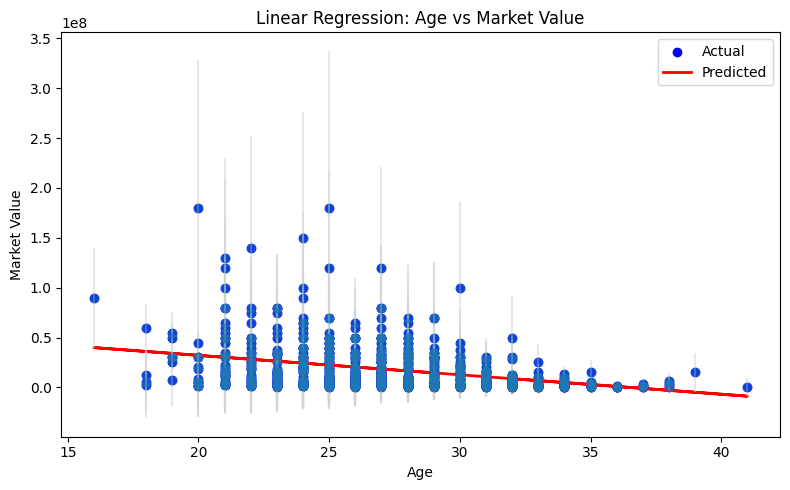

In [53]:
# Linear Regression
regression_model, y_pred = train_regression(data)
plot_regression(data, y_pred)

<p>The scatter plot illustrates the results of a linear regression analysis examining the relationship between Age and Market Value. The blue dots represent the actual data points, indicating the observed market values for players of different ages. The red line represents the predicted market values from the linear regression model. The error bars, shown in light gray, represent the absolute differences between the actual and predicted values, providing a visual indication of the prediction errors.</p>

<p>From the plot, it is evident that there is a slight downward trend in market value as age increases, indicated by the negative slope of the red regression line. However, the actual data points show a wide dispersion, particularly for younger players (ages 15-25), where market values vary significantly. This suggests that while age has some influence on market value, other factors also play a substantial role. The presence of large error bars further indicates the limitations of the linear model in accurately predicting market values, highlighting the need for more complex models to better capture the underlying patterns.</p>
